In [96]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [29]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [35]:
Station=Base.classes.stations
Measurement= Base.classes.measurements
session=Session(engine)

# Precipitation Analysis

In [36]:
#Date one year ago
year_ago_date = dt.date.today() - dt.timedelta(days=365)
year_ago_date

datetime.date(2017, 5, 6)

In [277]:
#quering the prcp values for one year
# the thing i wanna display should be written after session.query

#i have taken the average as there were more than one temp observation for a single day

Prcp_values_one_year=session.query(Measurement.date,func.avg(Measurement.prcp)).\
filter(Measurement.date > year_ago_date).group_by(Measurement.date).order_by(Measurement.date).all()

Prcp_values_one_year

[('2017-05-07', 0.024),
 ('2017-05-08', 0.5016666666666666),
 ('2017-05-09', 0.9260000000000002),
 ('2017-05-10', 0.14333333333333334),
 ('2017-05-11', 0.12),
 ('2017-05-12', 0.032),
 ('2017-05-13', 0.048),
 ('2017-05-14', 0.244),
 ('2017-05-15', 0.176),
 ('2017-05-16', 0.06999999999999999),
 ('2017-05-17', 0.025000000000000005),
 ('2017-05-18', 0.14166666666666666),
 ('2017-05-19', 0.01),
 ('2017-05-20', 0.0075),
 ('2017-05-21', 0.002),
 ('2017-05-22', 0.072),
 ('2017-05-23', 0.11833333333333333),
 ('2017-05-24', 0.6483333333333333),
 ('2017-05-25', 0.37000000000000005),
 ('2017-05-26', 0.004),
 ('2017-05-27', 0.085),
 ('2017-05-28', 0.06833333333333334),
 ('2017-05-29', 0.084),
 ('2017-05-30', 0.346),
 ('2017-05-31', 0.074),
 ('2017-06-01', 0.006666666666666667),
 ('2017-06-02', 0.06799999999999999),
 ('2017-06-03', 0.122),
 ('2017-06-04', 0.19166666666666665),
 ('2017-06-05', 0.013333333333333334),
 ('2017-06-06', 0.0),
 ('2017-06-07', 0.0016666666666666668),
 ('2017-06-08', 0.005),

In [281]:
length_prcpvalues_lastyear=len(Prcp_values_one_year)
#number_of_xticks_to display=10
date_spacing=int(length_prcpvalues_lastyear/10)
date_spacing


10

C:\Users\karis\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


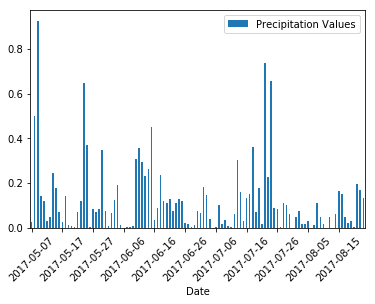

In [282]:
# Plotting the Precipitation Results in a Matplotlib bar chart
import matplotlib.ticker as mticker
df=pd.DataFrame(Prcp_values_one_year, columns=['Date', 'Precipitation Values'])

n = 10
df.set_index('Date', inplace=True)
ax = df.plot(kind='bar')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xticks(rotation='45')
ax.figure.show()



In [ ]:
# Plotting the Precipitation Results in a Matplotlib bar chart
#import matplotlib.ticker as mticker
df=pd.DataFrame(Prcp_values_one_year, columns=['Date', 'Precipitation Values'])
df.set_index('Date', inplace=True)

df.plot.bar()
df.plot(x_compat=True,color = 'blue')
#myLocator = mticker.MultipleLocator(15)
#ax.xaxis.set_major_locator(myLocator)
plt.xticks(rotation='45')
plt.show()

# Station Analysis

In [87]:
#Design a query to calculate the total number of stations
Total_stations=session.query(func.count(Station.station)).scalar()
Total_stations

9

In [107]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
sel=[Measurement.station,func.count(Measurement.station)]
Active_Stations=session.query(*sel).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
Active_Stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [297]:
#Which station has the highest number of observations?
Highest_obs_station=session.query(Measurement.station).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

Station_name=session.query(Station.name).filter(Station.station == Highest_obs_station[0]).all()

print(f"Highest number of obs::")
print(f"Station Code: {Highest_obs_station}")
print(f"Station Name: {Station_name[0]}")

Highest number of obs::
Station Code: ('USC00519281',)
Station Name: ('WAIHEE 837.5, HI US',)


In [291]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).

#Have taken  the average value of temp observation recorded by all the station in that particular day
last_12mts_temmp=session.query(Measurement.date,func.avg(Measurement.tobs)).filter(Measurement.date>=year_ago_date).\
group_by(Measurement.date).all()
last_12mts_temmp

[('2017-05-06', 77.5),
 ('2017-05-07', 75.4),
 ('2017-05-08', 72.83333333333333),
 ('2017-05-09', 73.4),
 ('2017-05-10', 75.16666666666667),
 ('2017-05-11', 75.6),
 ('2017-05-12', 75.0),
 ('2017-05-13', 75.4),
 ('2017-05-14', 75.4),
 ('2017-05-15', 75.2),
 ('2017-05-16', 75.16666666666667),
 ('2017-05-17', 75.5),
 ('2017-05-18', 71.66666666666667),
 ('2017-05-19', 73.25),
 ('2017-05-20', 76.25),
 ('2017-05-21', 74.2),
 ('2017-05-22', 74.4),
 ('2017-05-23', 75.66666666666667),
 ('2017-05-24', 74.66666666666667),
 ('2017-05-25', 74.83333333333333),
 ('2017-05-26', 75.0),
 ('2017-05-27', 74.5),
 ('2017-05-28', 76.5),
 ('2017-05-29', 75.8),
 ('2017-05-30', 76.2),
 ('2017-05-31', 78.0),
 ('2017-06-01', 78.16666666666667),
 ('2017-06-02', 78.0),
 ('2017-06-03', 78.0),
 ('2017-06-04', 78.5),
 ('2017-06-05', 77.33333333333333),
 ('2017-06-06', 76.83333333333333),
 ('2017-06-07', 77.83333333333333),
 ('2017-06-08', 77.0),
 ('2017-06-09', 77.8),
 ('2017-06-10', 75.8),
 ('2017-06-11', 77.0),
 ('2

In [304]:
#Filter by the station with the highest number of observations.

#filtering out the station with the highest number of obs FOR THE LAST YEAR as highest number of observations recorded by station
#in last one year is different from when all these years taken together


Highest_obs_station_oneyear=session.query(Measurement.station).group_by(Measurement.station).\
filter(Measurement.date >= year_ago_date).order_by(func.count(Measurement.station).desc()).first()

Station_name_oneyear=session.query(Station.name).filter(Station.station == Highest_obs_station_oneyear[0]).all()

print(f"Highest number of obs in last year::")
print(f"Station Code: {Highest_obs_station_oneyear}")
print(f"Station Name: {Station_name_oneyear[0]}")


Highest number of obs in last year::
Station Code: ('USC00519397',)
Station Name: ('WAIKIKI 717.2, HI US',)


In [310]:
#Filter by the station with the highest number of observations.
Temp_obs_oneyear=session.query(Measurement.station,Measurement.date,Measurement.tobs).\
filter(Measurement.date >= year_ago_date).\
filter(Measurement.station==Highest_obs_station_oneyear[0]).\
order_by(Measurement.date).all()
Temp_obs_oneyear

[('USC00519397', '2017-05-06', 79.0),
 ('USC00519397', '2017-05-07', 79.0),
 ('USC00519397', '2017-05-08', 77.0),
 ('USC00519397', '2017-05-10', 78.0),
 ('USC00519397', '2017-05-11', 78.0),
 ('USC00519397', '2017-05-12', 79.0),
 ('USC00519397', '2017-05-13', 79.0),
 ('USC00519397', '2017-05-14', 77.0),
 ('USC00519397', '2017-05-15', 78.0),
 ('USC00519397', '2017-05-16', 78.0),
 ('USC00519397', '2017-05-17', 78.0),
 ('USC00519397', '2017-05-18', 73.0),
 ('USC00519397', '2017-05-19', 76.0),
 ('USC00519397', '2017-05-20', 78.0),
 ('USC00519397', '2017-05-21', 76.0),
 ('USC00519397', '2017-05-22', 77.0),
 ('USC00519397', '2017-05-23', 87.0),
 ('USC00519397', '2017-05-24', 77.0),
 ('USC00519397', '2017-05-25', 77.0),
 ('USC00519397', '2017-05-27', 74.0),
 ('USC00519397', '2017-05-28', 76.0),
 ('USC00519397', '2017-05-29', 75.0),
 ('USC00519397', '2017-05-30', 76.0),
 ('USC00519397', '2017-05-31', 79.0),
 ('USC00519397', '2017-06-01', 79.0),
 ('USC00519397', '2017-06-02', 79.0),
 ('USC005193

In [311]:
#Creating dataframe for the plot
df=pd.DataFrame(Temp_obs_oneyear, columns=['Station', 'Date','tobs'])

Text(0.5,1,"Temp obs by [('WAIKIKI 717.2, HI US',)] for Hawaii")

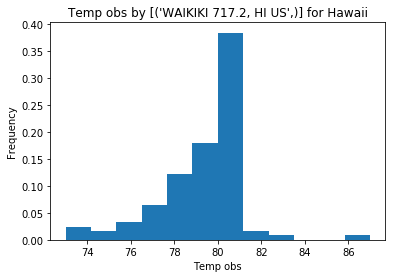

In [312]:
x_axis = df['tobs']
plt.hist(x_axis, normed=True, bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temp obs')
plt.title(f"Temp obs by {Station_name_oneyear} for Hawaii")

#Temperature Analysis

In [313]:
def calc_temps(start_date,end_date):
    
        start_date_lastyear=(dt.datetime.strptime(start_date, '%Y-%m-%d'))-dt.timedelta(days=365)
        end_date_lastyear=(dt.datetime.strptime(end_date, '%Y-%m-%d'))-dt.timedelta(days=365)
        #print(start_date_lastyear)
    
        #as the temperature is recorded by various stations for a single day, so averaging out the temps
        min_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.date >=start_date_lastyear).\
        filter(Measurement.date <= end_date_lastyear).group_by(Measurement.date).\
        order_by(func.avg(Measurement.tobs)).first()
        #print(min_temp)
    
        max_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.date >=start_date_lastyear).\
        filter(Measurement.date <= end_date_lastyear).group_by(Measurement.date).\
        order_by(func.avg(Measurement.tobs).desc()).first()
        #print(max_temp)
    
        avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.date >=start_date_lastyear).\
        filter(Measurement.date <= end_date_lastyear).all()
        
        return min_temp,max_temp,avg_temp
    

start_date='2018-02-05'
end_date='2018-02-10'
min_temp,max_temp,avg_temp=calc_temps(start_date, end_date)
print (min_temp,max_temp,avg_temp)




(63.285714285714285,) (75.16666666666667,) [(67.97058823529412,)]


C:\Users\karis\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


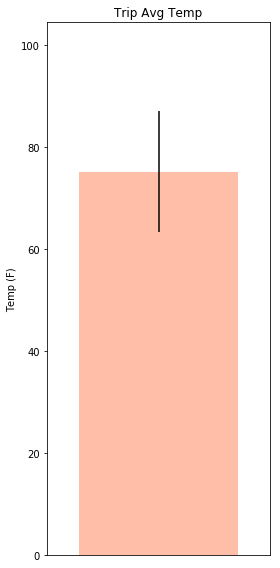

In [314]:
#Boxplot
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = max_temp[0]-min_temp[0]
bar = ax.bar(xpos, max_temp, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()